# Exploratory Data Analysis

## Imports

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})

## Load the dataset

In [2]:
df = pd.read_csv('../data/potential-talents - Aspiring human resources - seeking human resources.csv') 
print('Data size',df.shape)
df.head()

Data size (104, 5)


,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [3]:
df.tail()

,id,job_title,location,connection,fit
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN
103,104,Director Of Administration at Excellence Logging,"Katy, Texas",500+,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


## Checking for missing values

In [5]:
# Compute percentage of missing values
missing_values = (df.isnull().sum()/df.shape[0])*100

# Dataframe of missing values
missing_df = pd.DataFrame(
    {
        'Variable': missing_values.index, 
        '% missing values': missing_values.values
    }
)
missing_df.sort_values(
    by = '% missing values', 
    ascending=False)\
.reset_index(drop=True)

,Variable,% missing values
0,fit,100.0
1,id,0.0
2,job_title,0.0
3,location,0.0
4,connection,0.0


Lets clean up our data

In [6]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"|", "")
    df[text_field] = df[text_field].str.replace(r"(", "")
    df[text_field] = df[text_field].str.replace(r")", "")
    df[text_field] = df[text_field].str.replace(r"-", " ")
    df[text_field] = df[text_field].str.replace(r"!", "")
    df[text_field] = df[text_field].str.lower()
    return df

df = standardize_text(df, "job_title")

df.to_csv("../data/clean_data.csv")
df.head()

,id,job_title,location,connection,fit
0,1,2019 c.t. bauer college of business graduate m...,"Houston, Texas",85,NaN
1,2,native english teacher at epik english program...,Kanada,500+,NaN
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,people development coordinator at ryan,"Denton, Texas",500+,NaN
4,5,advisory board member at celal bayar university,"İzmir, Türkiye",500+,NaN


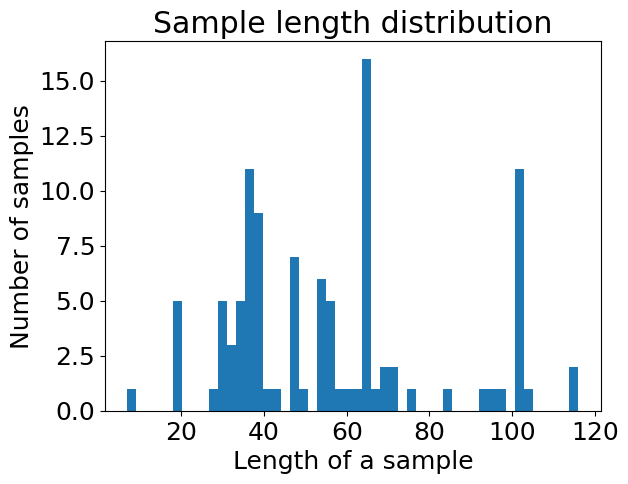

In [7]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
plot_sample_length_distribution(df['job_title'].to_list())


In [8]:
def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

num_word_sample = get_num_words_per_sample(df['job_title'].to_list())
print(num_word_sample)

7.0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.

    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names_out())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=90)
    plt.show()

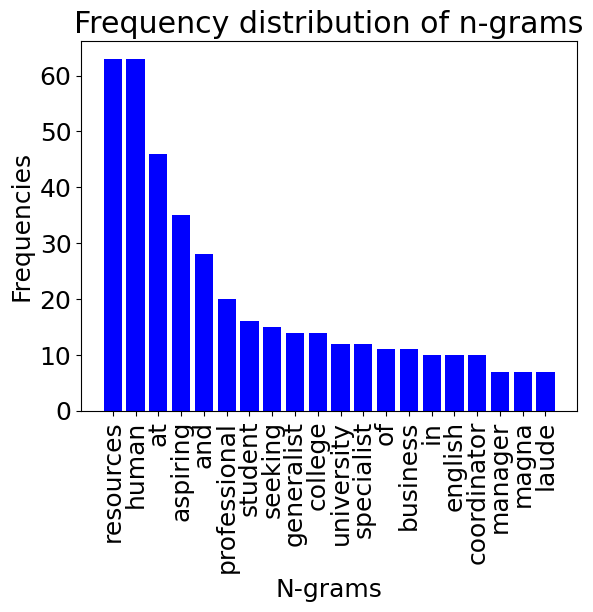

In [10]:
plot_frequency_distribution_of_ngrams(df['job_title'].to_list(), num_ngrams=20)

number of characters present in each sentence

<Axes: >

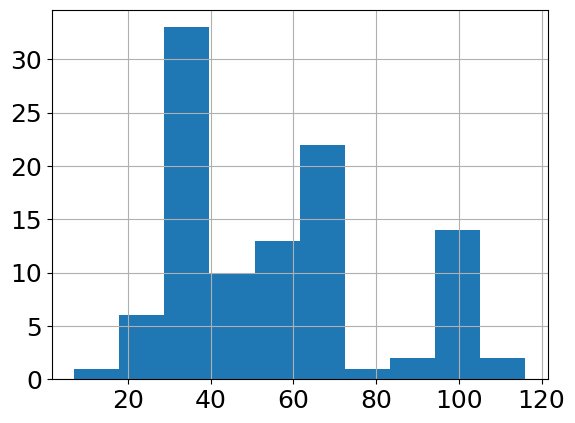

In [11]:
df['job_title'].str.len().hist()

 number of words appearing in job title.

<Axes: >

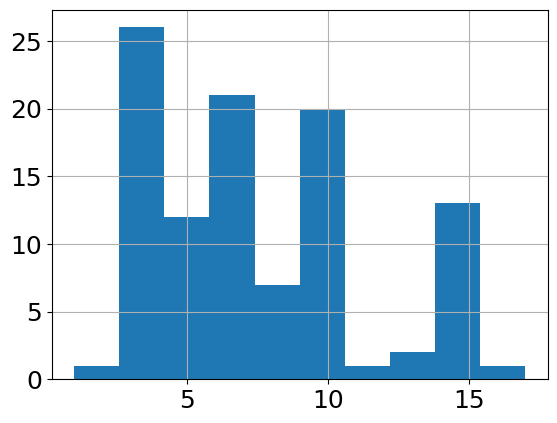

In [19]:
df['job_title'].str.split().map(lambda x: len(x)).hist()

average word length in each sentence

<Axes: >

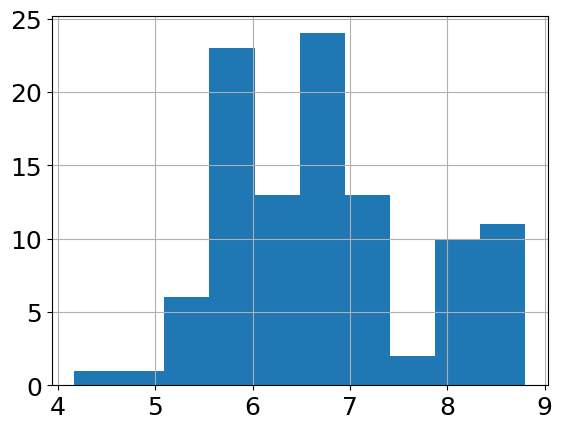

In [17]:
df['job_title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

Using nltk library to get the corpus containing stopwords.

In [23]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords if you haven't already
nltk.download('stopwords')

# Get the set of English stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hkim1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


creating corpus and plot stopwords

<BarContainer object of 10 artists>

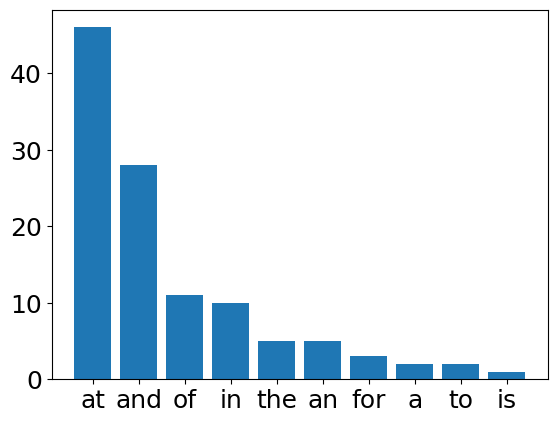

In [30]:
corpus=[]
job_title= df['job_title'].str.split()
job_title=job_title.values.tolist()
corpus=[word for i in job_title for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)

<Axes: >

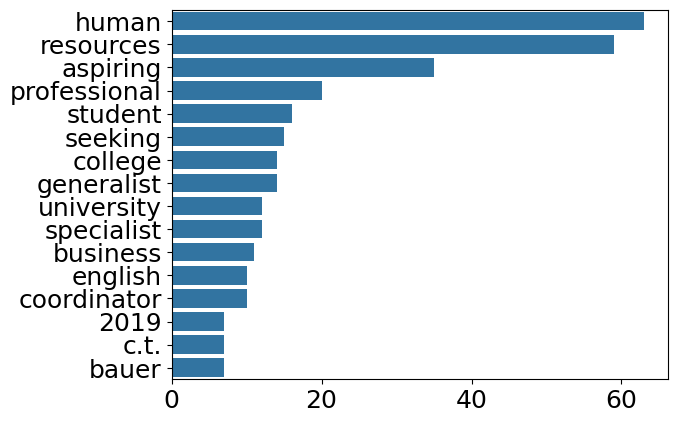

In [33]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

"human", "resources" and "aspiring" dominate the job title

## Ngram exploration

In [34]:
from nltk.util import ngrams

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

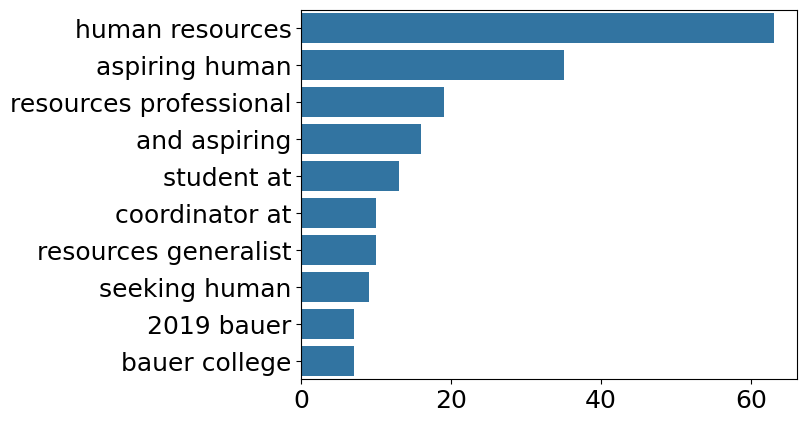

In [37]:
top_n_bigrams=get_top_ngram(df['job_title'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)


<Axes: >

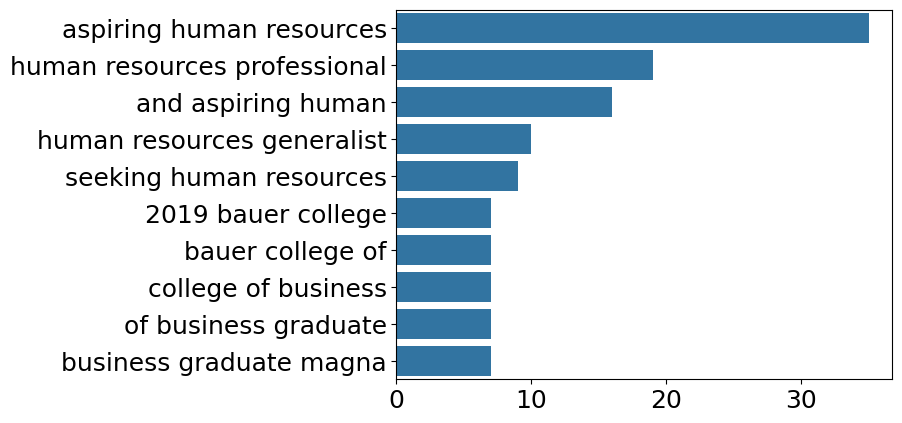

In [38]:
top_tri_grams=get_top_ngram(df['job_title'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

## Topic modeling exploration with pyLDAvis

In [41]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_jobs(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for jobs in df['job_title']:
        words=[w for w in word_tokenize(jobs) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_jobs(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hkim1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hkim1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


creating bag of words

In [44]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [45]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.103*"university" + 0.062*"student" + 0.036*"chapman" + 0.036*"advisory" + 0.036*"celal" + 0.036*"member" + 0.036*"board" + 0.036*"bayar" + 0.019*"business" + 0.011*"retail"'),
 (1,
  '0.132*"resource" + 0.132*"human" + 0.067*"aspiring" + 0.039*"specialist" + 0.039*"professional" + 0.032*"coordinator" + 0.029*"seeking" + 0.020*"manager" + 0.020*"senior" + 0.020*"development"'),
 (2,
  '0.074*"resource" + 0.074*"human" + 0.049*"aspiring" + 0.048*"college" + 0.048*"generalist" + 0.032*"professional" + 0.025*"business" + 0.025*"graduate" + 0.025*"magna" + 0.025*"2019"'),
 (3,
  '0.098*"english" + 0.050*"korea" + 0.050*"program" + 0.050*"teacher" + 0.050*"epik" + 0.050*"native" + 0.012*"director" + 0.012*"jti" + 0.012*"rrp" + 0.012*"international"')]

## References

[1] https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

[2] https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[3] https://developers.google.com/machine-learning/guides/text-classification/

[4] https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools